<a href="https://colab.research.google.com/github/Yogesh9389/MachineLearning-/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score
%matplotlib inline
df = pd.read_csv('/content/diabetes2.csv')
df_temp = df.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

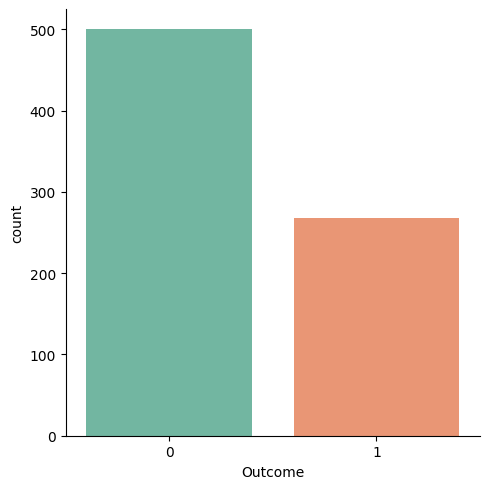

In [ ]:
# The visualisation of outcome
sns.catplot(x="Outcome", kind="count", data=df_temp, palette="Set2")
plt.show()

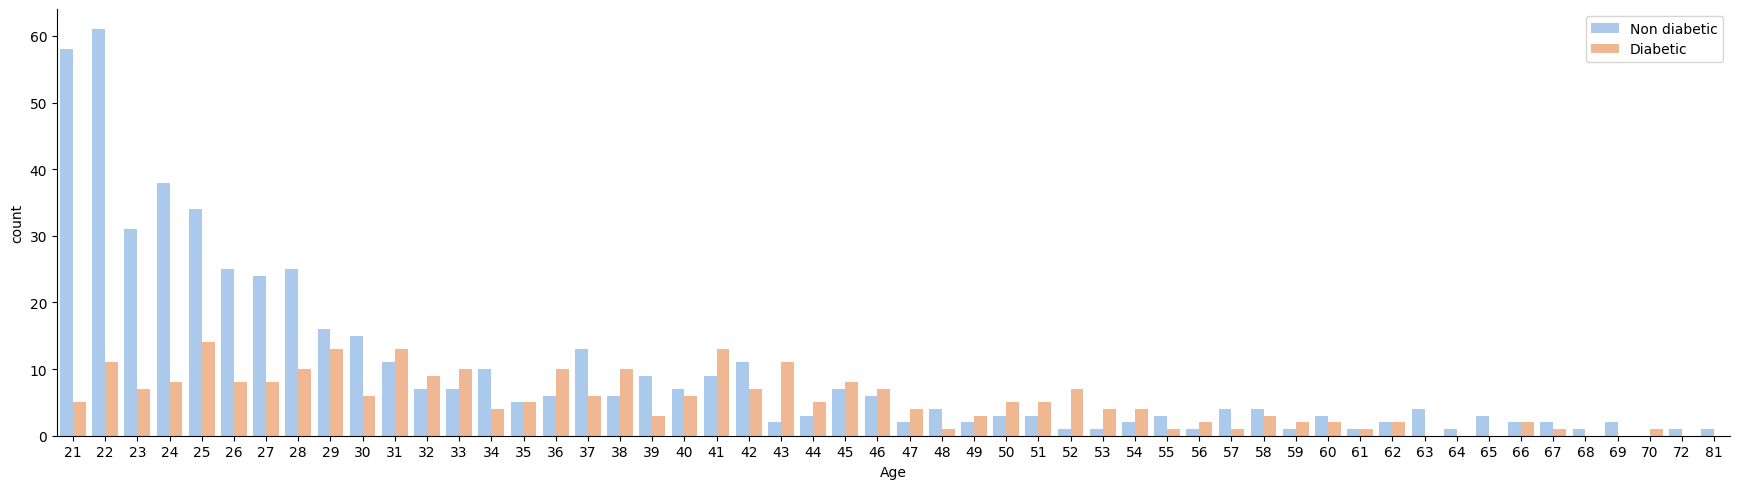

In [ ]:
# The visualisation count of Age of their diabetics
ax = sns.catplot(x="Age", kind="count",hue="Outcome",data=df_temp, palette="pastel", legend=False)
ax.fig.set_figwidth(20)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])
plt.show()

In [ ]:
# Age Distribution
fig = px.histogram(df, x="Age",
marginal="box")
fig.show()

In [ ]:
# Age distribution by Outcome 0
fig = px.histogram(df, x=df[df.Outcome==0].Age,
marginal="box",
color_discrete_sequence=['lightgreen'])
fig.show()

In [ ]:
# Age distribution by Outcome 0
fig = px.histogram(df, x=df[df.Outcome==1].Age,
marginal="box",
color_discrete_sequence=['purple'])
fig.show()

In [ ]:
# Glucose distribution by Outcome 1
fig = px.histogram(df, x=df[df.Outcome==1].Glucose,
marginal="box",
color_discrete_sequence=['#AB63FA'])
fig.show()


In [ ]:
# Average Glucose for Diabetics person
df[df.Outcome==1].Glucose.mean()
141.25746268656715
x = df_temp.drop(['Outcome'], axis = 1)
y = df_temp.loc[:,"Outcome"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


In [ ]:
lr = LogisticRegression(solver='liblinear', max_iter = 10) #solve=liblinear kaggle için gerekli
lr.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LogisticRegression(max_iter=10, solver='liblinear')

In [ ]:
x_pred = lr.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, x_pred)

array([[311,  32],
       [120,  51]])

In [ ]:
#train score
score = accuracy_score(y_train, x_pred)
score


0.7042801556420234

In [ ]:
y_pred = lr.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[143,  61],
       [ 14,  36]])

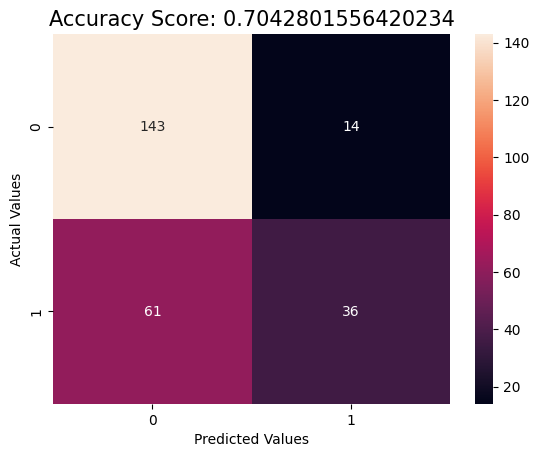

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       157
           1       0.72      0.37      0.49        97

    accuracy                           0.70       254
   macro avg       0.71      0.64      0.64       254
weighted avg       0.71      0.70      0.68       254



In [ ]:
# Defined data set (it should be diabetic)
data = [[5, 150, 33.7, 50, 150, 74, 0.5, 53]]
# Create the pandas DataFrame
df_test = pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','A'])
# Predict on new data
res = lr.predict(df_test)
res


ValueError: ignored

# New Section